Voy a intentar leer los archivos viejos con la info del experimento de umbral completo.

En su momento los guarde en un pickle pero por alguna razon tira error

Aca parece estar la informacion mas completa

/home/ionatan/BackUpsPorFecha/IPyVisound (Post Piloto)/Old/backups

Pero lo ideal seria recuperar la info que viene de...

/home/ionatan/BackUpsPorFecha/IPyVisound (Post Piloto)/Old/Guardados_old/Analisis Umbral Paralelismo

donde ya esta la data procesada y filtrada, el tema es que es un pickle y no estoy seguro depoder recuperarlo.

voy a copiarlo a otra carpeta para trabajar

los copie a /home/ionatan/Gits/IPyVisound/Paper/Datos Umbral Completo

Al parecer era un problema de que el panbdas estaba desactualizado. Se ve que cambie algo y ahora tenia una version mas vieja que antes!

In [1]:
%matplotlib inline
import os
import pickle
import pandas as pd
from IPython.display import display
import numpy as np
from scipy.optimize import curve_fit

In [7]:
filename = 'DatosUmbralCompleto/MedicionUmbralCompletaNr1.touch'
if os.path.isfile(filename):
    with open(filename, 'rb') as f:
            Usuario1 = pickle.load(f)
else:
    display ('ERROR! : No se encontro el archivo ' + filename + ' con el registro de las sessiones.')

filename = 'DatosUmbralCompleto/MedicionUmbralCompletaNr2.touch'
if os.path.isfile(filename):
    with open(filename, 'rb') as f:
            Usuario2 = pickle.load(f)
else:
    display ('ERROR! : No se encontro el archivo ' + filename + ' con el registro de las sessiones.')
    
filename = 'DatosUmbralCompleto/MedicionUmbralCompletaNr3.touch'
if os.path.isfile(filename):
    with open(filename, 'rb') as f:
            Usuario3 = pickle.load(f)
else:
    display ('ERROR! : No se encontro el archivo ' + filename + ' con el registro de las sessiones.')
    
# Vamos a chequear e interpretar los datos

# Usuario 1

# Vamos a revisar cuantos touchs hay para cada nivel
data = Usuario1
niveles = data['levelInstance'].unique()

data = data.drop_duplicates(['touchInstance'])
data = data[data['levelInstance'].isin(niveles[:-1])]
User1 = data

data = Usuario2
niveles = data['levelInstance'].unique()
data = data[data['levelInstance']!=niveles[3]]
User2 = data

data = Usuario3
User3 = data

# niveles = data['levelInstance'].unique()

# niveles = data['levelInstance'].unique()

# print (len(niveles))

# for nivel in niveles:
#     print (data[data['levelInstance']==nivel].iloc[0]['levelTitle'])
#     print (len(data[data['levelInstance']==nivel]))


data = pd.concat([User1,User2,User3])

data["trialnum"] = None
grouped = data[["levelInstance", "trialnum"]].groupby("levelInstance")
data["trialnum"] = grouped.transform(lambda x: list(range(len(x))))

# cheqeuamos que esten ordenados

# grouped = data[["levelInstance", "trialInstance"]].groupby("levelInstance") 

# for groupName, group in grouped:
#     display (group['trialInstance'].diff())

DataFinal = data[data['trialnum']==39]
DataFinal = DataFinal[['jsonMetaDataRta','levelInstance','levelTitle','Alias']]

# Creamos un dict para unificar las orientaciones
orientaciones = {'H0R:-6.0º':'6', 'H1R:-3.0º':'3', 'H2R:0.0º':'0', 'H3R:3.0º':'3', 'H4R:6.0º':'6',
       '1C0R:10.0º':'10', '1C1R:20.0º':'20', '1C2R:30.0º':'30', '1C3R:40.0º':'40',
       '1C4R:50.0º':'50', '1C5R:60.0º':'60', '1C6R:70.0º':'70', '1C7R:80.0º':'80', 'V0R:86.0º':'86',
       'V1R:88.0º':'88', 'V2R:90.0º':'90', 'V3R:92.0º':'88', 'V4R:94.0º':'86', '2C0R:100.0º':'80',
       '2C1R:110.0º':'70', '2C2R:120.0º':'60', '2C3R:130.0º':'50', '2C4R:140.0º':'40',
       '2C5R:150.0º':'30', '2C6R:160.0º':'20', '2C7R:170.0º':'10'}
DataFinal['Orientacion'] = DataFinal['levelTitle'].map(orientaciones)

# Buscamos dentro de la info donde esta el valor relevante
Detalles = pd.DataFrame.from_dict(DataFinal['jsonMetaDataRta'])
for key in Detalles.iloc[0]['jsonMetaDataRta']:
    Detalles[key] = Detalles['jsonMetaDataRta'].map(lambda x: x[key])
for key in Detalles.iloc[0]['infoConceptual']:
    Detalles[key] = Detalles['infoConceptual'].map(lambda x: x[key])
DataFinal['deltaAngulo'] = Detalles['deltaAngulo']

DataFinal['Orientacion'] = pd.to_numeric(DataFinal['Orientacion'])

# Vamos a agregar la sensibilidad, como inversa del umbral
DataFinal['sensibilidad'] = DataFinal['deltaAngulo'].map(lambda x: 1/x)



array([ 0.3961074 ,  0.04516609,  0.02392747])

array([[ 0.00663203,  0.00348323, -0.04335825],
       [ 0.00348323,  0.01512353, -0.06930128],
       [-0.04335825, -0.06930128,  0.83733143]])

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


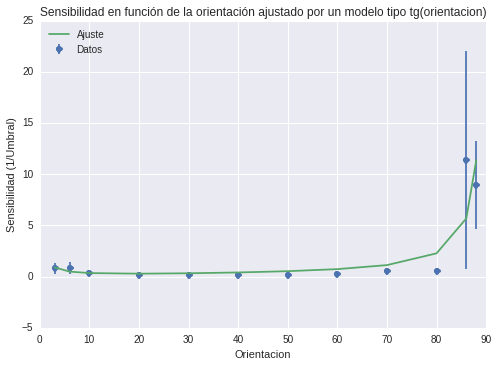

In [131]:
usuarios = ['Ioni1','Ioni2']
#usuarios = ['Iael']
#usuarios = ['Ioni1','Ioni2','Iael']
# Ajuste sensibilidad
xdata = DataFinal['Orientacion'].unique()
#xdata = np.deg2rad(xdata)
xdata = np.sort(xdata)
sensibilidad = DataFinal[DataFinal['Alias'].isin(usuarios)][['sensibilidad','Orientacion']].groupby('Orientacion').mean()
errsensibilidad = DataFinal[DataFinal['Alias'].isin(usuarios)][['sensibilidad','Orientacion']].groupby('Orientacion').std()
sensibilidad = sensibilidad['sensibilidad']
errsensibilidad = errsensibilidad['sensibilidad']

# Excluimos los ejes...
xdata=xdata[1:13]
sensibilidad=sensibilidad[1:13]
errsensibilidad=errsensibilidad[1:13]
#plt.plot(xdata,sensibilidad,'*',label='Datos')
plt.errorbar(xdata, sensibilidad, yerr=errsensibilidad, fmt='o', label='Datos')


def func(x, a, b, c):
    return a * np.tan(np.deg2rad(x)) + b * 1/np.tan(np.deg2rad(x)) + c
    
x = np.arange(0,np.pi/2,0.001)
popt, pcov = curve_fit(func, xdata, sensibilidad)
yajustado = func(xdata, popt[0], popt[1], popt[2])
plt.plot(xdata,yajustado,label='Ajuste')
plt.title('Sensibilidad en función de la orientación ajustado por un modelo tipo tg(orientacion)')
plt.legend(loc=2)
plt.xlabel('Orientacion')
plt.ylabel('Sensibilidad (1/Umbral)')
display (popt, pcov)


In [129]:
popt, pcov

(array([ 0.33572913,  0.05982656, -0.3763042 ]),
 array([[ 0.00023032,  0.00012097, -0.00150577],
        [ 0.00012097,  0.00052522, -0.00240673],
        [-0.00150577, -0.00240673,  0.02907923]]))

In [73]:
sensibilidad['sensibilidad']

Orientacion
0      1.004576
3      0.797922
6      0.849072
10     0.387626
20     0.209330
30     0.190173
40     0.201734
50     0.163179
60     0.274083
70     0.512236
80     0.568387
86    11.401285
88     8.967042
90    10.914348
Name: sensibilidad, dtype: float64

In [27]:
DataFinal[DataFinal['Alias']=='Ioni1'][['sensibilidad','Orientacion']]

,sensibilidad,Orientacion
39,0.227783,6
79,0.376057,3
119,0.797725,0
159,0.733777,3
199,0.525302,6
239,0.353037,10
279,0.133594,20
319,0.054187,30
359,0.101205,40
399,0.108480,50


/usr/lib/python3/dist-packages/matplotlib/figure.py:372: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


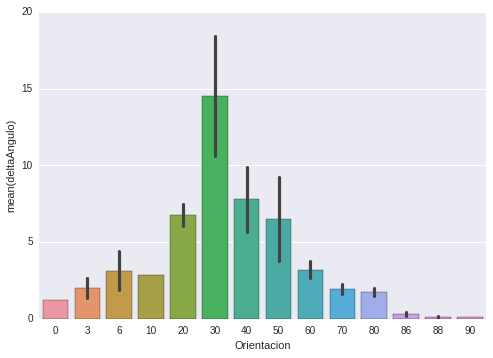

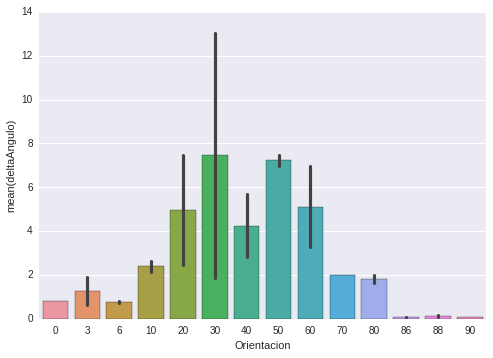

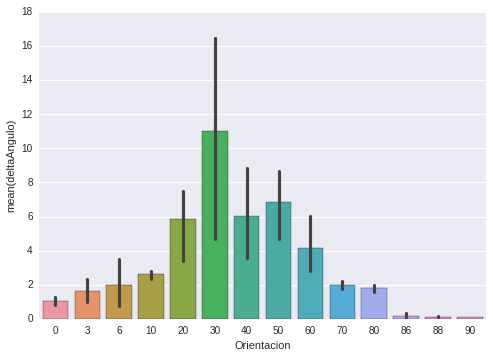

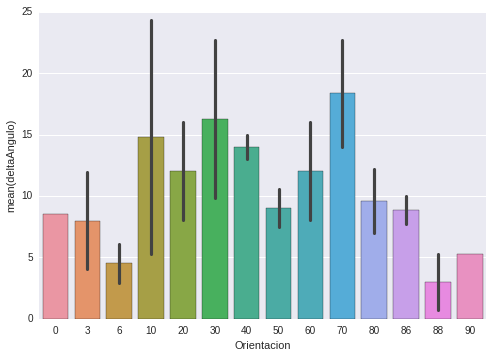

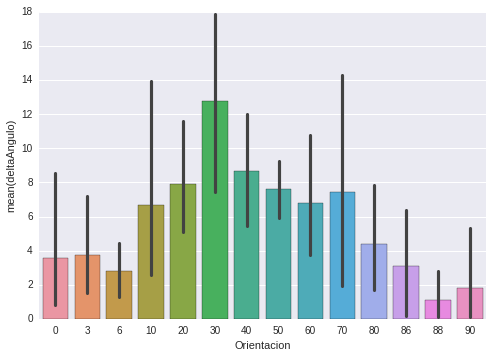

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
sns.barplot(x="Orientacion", y="deltaAngulo", data=DataFinal[DataFinal['Alias'] == 'Ioni1'], ax=ax)
fig.show()
fig, ax = plt.subplots(1, 1)
sns.barplot(x="Orientacion", y="deltaAngulo", data=DataFinal[DataFinal['Alias'] == 'Ioni2'], ax=ax)
fig.show()
fig, ax = plt.subplots(1, 1)
sns.barplot(x="Orientacion", y="deltaAngulo", data=DataFinal[DataFinal['Alias'].isin(['Ioni1', 'Ioni2'])], ax=ax)
fig.show()
fig, ax = plt.subplots(1, 1)
sns.barplot(x="Orientacion", y="deltaAngulo", data=DataFinal[DataFinal['Alias'] == 'Iael'], ax=ax)
fig.show()
fig, ax = plt.subplots(1, 1)
sns.barplot(x="Orientacion", y="deltaAngulo", data=DataFinal, ax=ax)
fig.show()

In [5]:
# Vamos a agregar la sensibilidad, como inversa del umbral
DataFinal['sensibilidad'] = DataFinal['deltaAngulo'].map(lambda x: 1/x)

/usr/lib/python3/dist-packages/matplotlib/figure.py:372: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


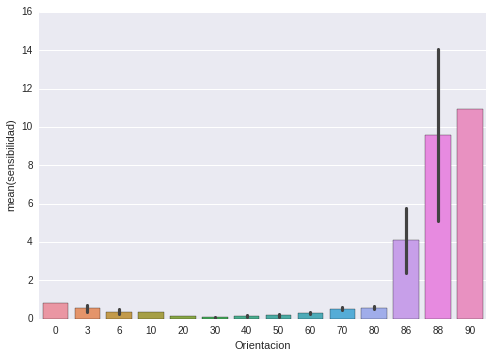

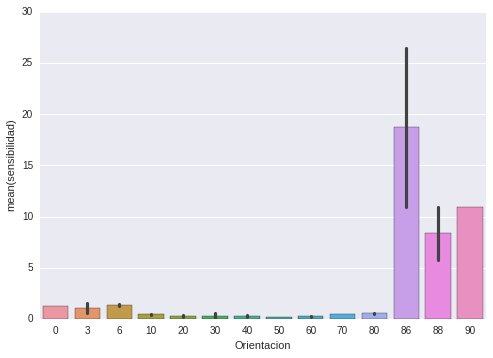

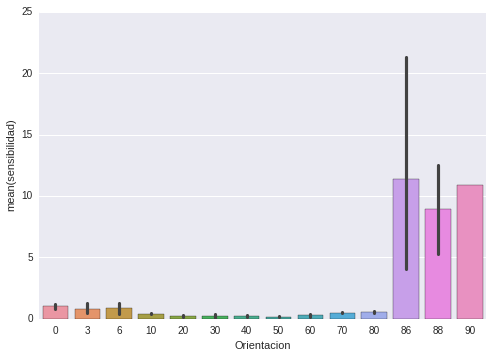

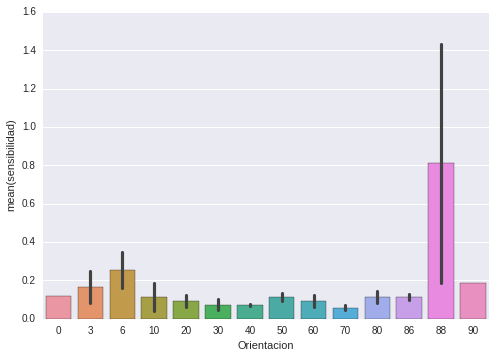

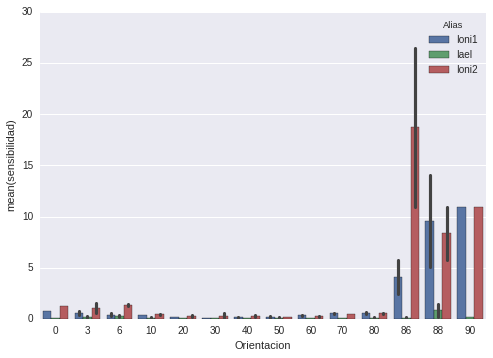

In [10]:
fig, ax = plt.subplots(1, 1)
sns.barplot(x="Orientacion", y="sensibilidad", data=DataFinal[DataFinal['Alias'] == 'Ioni1'], ax=ax)
fig.show()
fig, ax = plt.subplots(1, 1)
sns.barplot(x="Orientacion", y="sensibilidad", data=DataFinal[DataFinal['Alias'] == 'Ioni2'], ax=ax)
fig.show()
fig, ax = plt.subplots(1, 1)
sns.barplot(x="Orientacion", y="sensibilidad", data=DataFinal[DataFinal['Alias'].isin(['Ioni1', 'Ioni2'])], ax=ax)
fig.show()
fig, ax = plt.subplots(1, 1)
sns.barplot(x="Orientacion", y="sensibilidad", data=DataFinal[DataFinal['Alias'] == 'Iael'], ax=ax)
fig.show()
fig, ax = plt.subplots(1, 1)
sns.barplot(x="Orientacion", y="sensibilidad", data=DataFinal, ax=ax, hue='Alias')
fig.show()